In [1]:
import os

import numpy as np
import pandas as pd

from importlib import reload

from src import constants as Con

from src.predictive_modeling.answer_loc.answer_loc_data import (
    build_trial_level_with_area_metrics,
)
from src.predictive_modeling.answer_loc.answer_loc_models import (
    LastLocationBaseline,
    AreaMetricsLogRegModel,
    MixedEffectsLocationModel,
)
from src.predictive_modeling.answer_loc.answer_loc_eval import (
    evaluate_models_on_answer_location,
)
from src.predictive_modeling.answer_loc.answer_loc_viz import show_model_results
from src.predictive_modeling.common.viz_utils import plot_confusion_heatmap



In [2]:
hunters = pd.read_csv("../data/hunters.csv")
gatherers = pd.read_csv("../data/gatherers.csv")

In [5]:
models = [
    LastLocationBaseline(),
    AreaMetricsLogRegModel(name="area_log_reg+lastloc",include_last_location=True),
    AreaMetricsLogRegModel(name="area_log_reg+nolastloc",include_last_location=False),
    # MixedEffectsLocationModel(name="mixedlm_linear+lastloc",include_last_location=True),
    # MixedEffectsLocationModel(name="mixedlm_linear+nolastloc",include_last_location=False),

]

In [6]:
results_hunters = evaluate_models_on_answer_location(
    df=hunters,
    models=models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID, Con.TEXT_ID_WITH_Q_COLUMN),
    split_group_col=Con.PARTICIPANT_ID,
    last_loc_col=Con.LAST_VISITED_LOCATION,
    target_col=Con.SELECTED_ANSWER_POSITION_COLUMN,
    test_size=0.2,
    random_state=42,
    builder_fn=build_trial_level_with_area_metrics,
)
show_model_results(results_hunters)


C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was depreca

MODEL: last_location
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.673

Confusion Matrix:
        pred_0  pred_1  pred_2  pred_3
true_0     367      54      42      32
true_1      66     328      35      33
true_2      56      71     337      47
true_3      61      85      53     277

True label distribution (label → count):
0    495
1    462
2    511
3    476

Prediction distribution (label → count):
0    550
1    538
2    467
3    389

MODEL: area_log_reg+lastloc
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.576

Confusion Matrix:
        pred_0  pred_1  pred_2  pred_3
true_0     374      47      21      53
true_1     112     263      39      48
true_2      66      69     180     196
true_3      69      71      33     303

True label distribution (label → count):
0    495
1    462
2    511
3    476

Prediction distribution (label → count):
0    621
1    45

C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


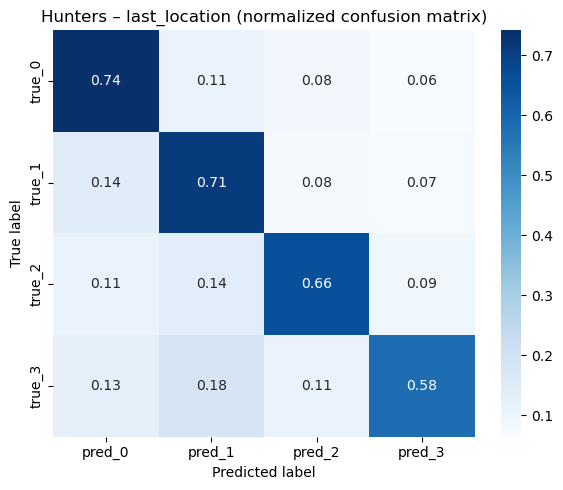

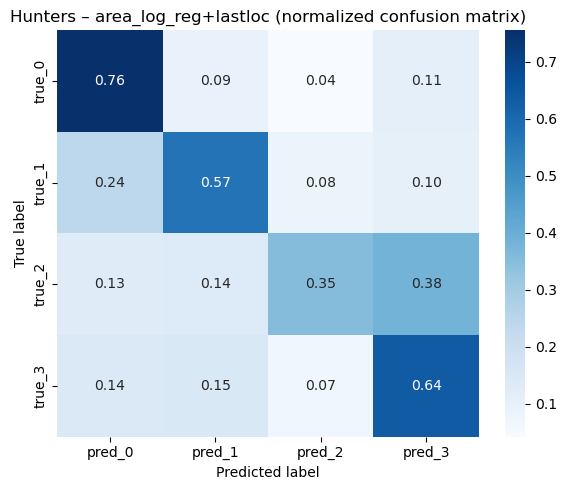

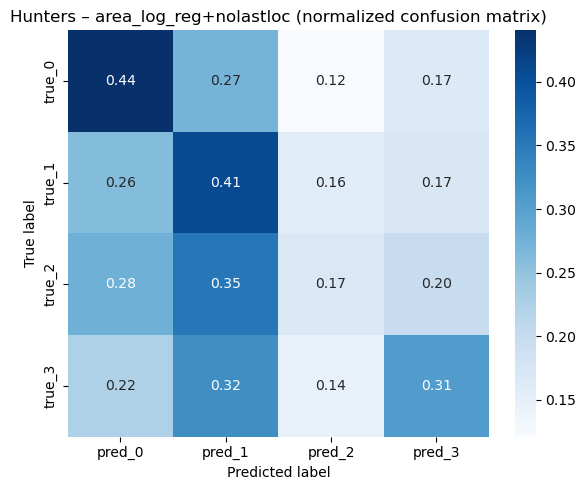

In [7]:
for name, res in results_hunters.items():
    plot_confusion_heatmap(
        y_true=res.y_true,
        y_pred=res.y_pred,
        labels=(0, 1, 2, 3),
        include_minus1=False,
        normalize=True,
        title=f"Hunters – {name} (normalized confusion matrix)",
    )

In [6]:
results_gatherers = evaluate_models_on_answer_location(
    df=gatherers,
    models=models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID, Con.TEXT_ID_WITH_Q_COLUMN),
    split_group_col=Con.PARTICIPANT_ID,
    last_loc_col=Con.LAST_VISITED_LOCATION,
    target_col=Con.SELECTED_ANSWER_POSITION_COLUMN,
    test_size=0.2,
    random_state=42,
    builder_fn=build_trial_level_with_area_metrics,
)
show_model_results(results_gatherers)


C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was depreca

MODEL: last_location
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.707

Confusion Matrix:
        pred_0  pred_1  pred_2  pred_3
true_0     384      67      25      21
true_1      36     380      24      34
true_2      63      63     314      51
true_3      64      79      42     297

True label distribution (label → count):
0    497
1    474
2    491
3    482

Prediction distribution (label → count):
0    547
1    589
2    405
3    403

MODEL: area_log_reg+lastloc
----------------------------------------------------------------------
Number of test trials: 1944
Accuracy: 0.608

Confusion Matrix:
        pred_0  pred_1  pred_2  pred_3
true_0     384      67       6      40
true_1      36     380       7      51
true_2      63      64      91     273
true_3      64      80      11     327

True label distribution (label → count):
0    497
1    474
2    491
3    482

Prediction distribution (label → count):
0    547
1    59

C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


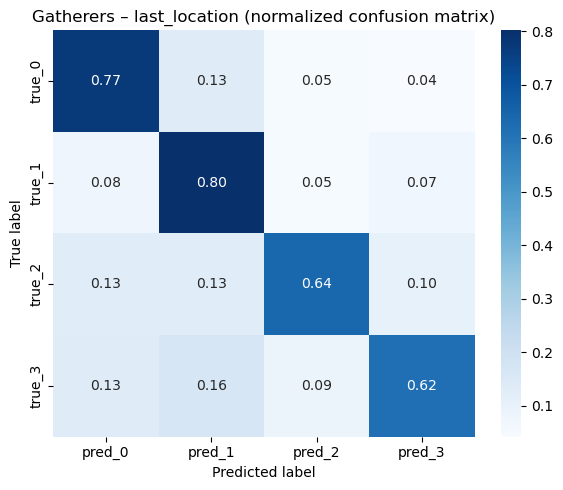

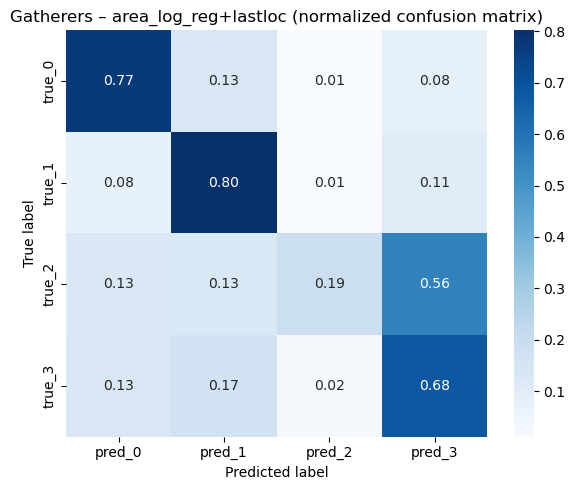

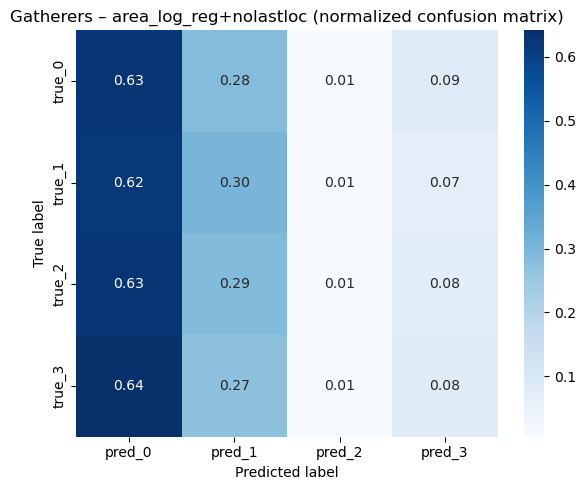

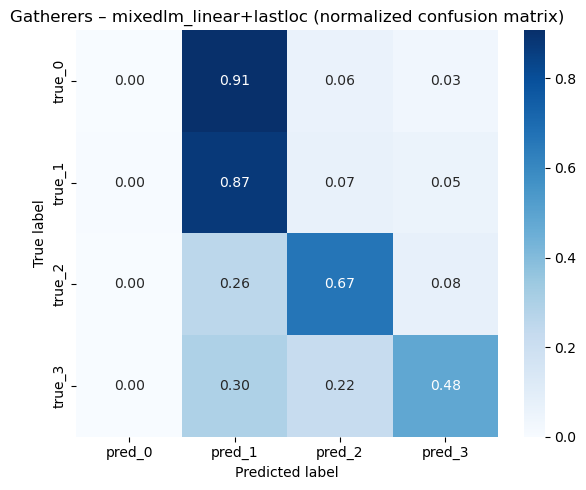

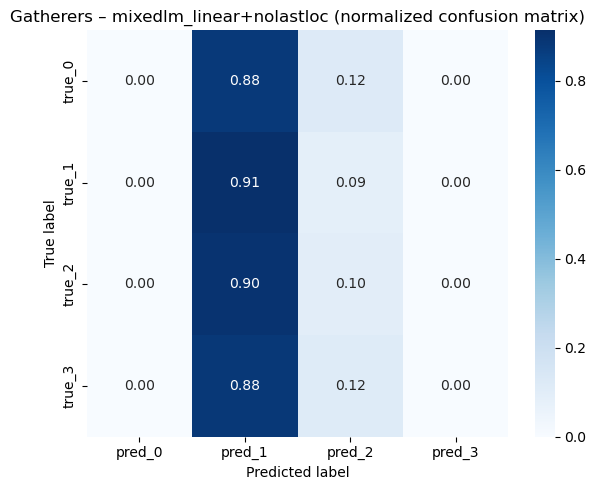

In [7]:
for name, res in results_gatherers.items():
    plot_confusion_heatmap(
        y_true=res.y_true,
        y_pred=res.y_pred,
        labels=(0, 1, 2, 3),
        include_minus1=False,
        normalize=True,
        title=f"Gatherers – {name} (normalized confusion matrix)",
    )